In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
file_path = '/content/drive/MyDrive/DICK Project/EMR/Patient_information_cleaned.csv'
df = pd.read_csv(file_path)


In [3]:
df.head()

,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,WEIGHT,SEX,...,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,PATIENT_CLASS_NM_ENCODED,PATIENT_CLASS_GROUP_ENCODED,OR_LOS_HOURS,AN_LOS_HOURS,HEIGHT_METRES,PRIMARY_PROCEDURE_NM_ENCODED,PRIMARY_ANES_TYPE_NM_ENCODED
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,Home Routine,1.0,0,2018-12-20,47,2832.47,0,...,Outpatient,Hospital Outpatient Surgery,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY",1,1,4.97,4.97,1.68,"[101, 23851, 1010, 9047, 7103, 24965, 27076, 1...",2
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,Hospice Facility,21.0,1,2019-09-27,81,2515.01,1,...,Outpatient,Hospital Outpatient Surgery,GI EGD DILATION,1,1,1.58,1.58,1.68,"[101, 21025, 1041, 2290, 2094, 29454, 3370, 102]",2
2,2f0090c47da34608,b68d6c7198f30f73,15.0,Home Routine,3.0,1,2019-04-08,49,1964.74,0,...,Inpatient,Hospital Inpatient Surgery,CRANIECTOMY,0,0,4.08,4.08,1.68,"[101, 13675, 7088, 22471, 16940, 102]",2
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,Home Routine,1.0,0,2018-12-03,54,2638.47,0,...,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",1,1,3.67,3.67,1.60,"[101, 13921, 1010, 8735, 1010, 7388, 102]",2
4,82f89e10f2855420,c2756216cc89b795,15.0,Home Routine,1.0,0,2019-04-19,44,1880.08,0,...,Outpatient,Hospital Outpatient Surgery,"REVISION, RECONSTRUCTION, BREAST",1,1,6.63,6.63,1.68,"[101, 13921, 1010, 8735, 1010, 7388, 102]",2


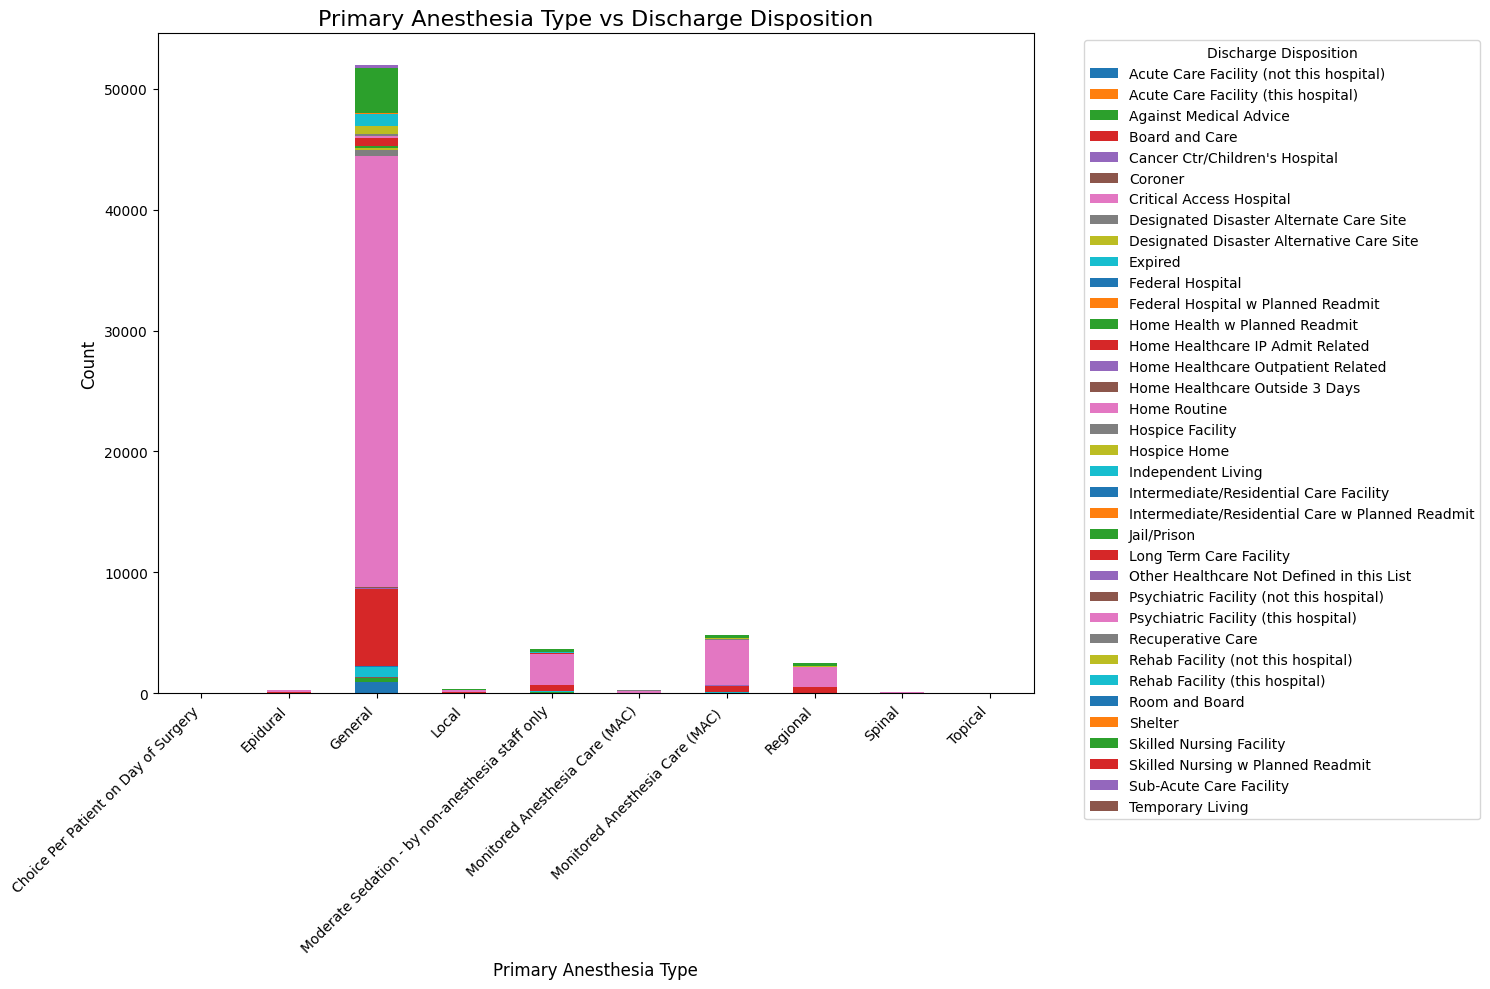

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

crosstab = pd.crosstab(df['PRIMARY_ANES_TYPE_NM'], df['DISCH_DISP'])


ax = crosstab.plot(kind='bar', stacked=True, figsize=(15, 10))

# Customize the plot
plt.title('Primary Anesthesia Type vs Discharge Disposition', fontsize=16)
plt.xlabel('Primary Anesthesia Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Discharge Disposition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

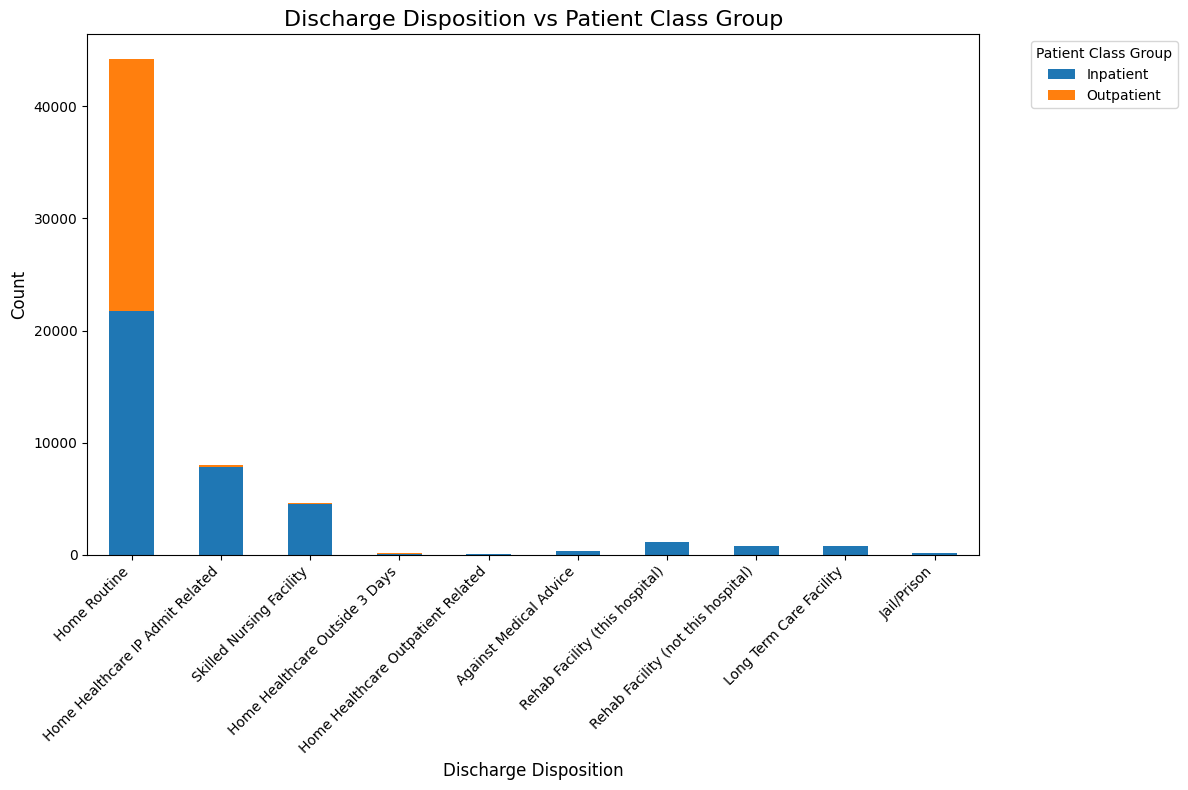

In [5]:
crosstab = pd.crosstab(df['DISCH_DISP'], df['PATIENT_CLASS_GROUP'])

crosstab = crosstab.sort_values(by=crosstab.sum().index[-1], ascending=False)

top_n = 10
crosstab_top = crosstab.head(top_n)

fig, ax = plt.subplots(figsize=(12, 8))

crosstab_top.plot(kind='bar', stacked=True, ax=ax)


plt.title('Discharge Disposition vs Patient Class Group', fontsize=16)
plt.xlabel('Discharge Disposition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Patient Class Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

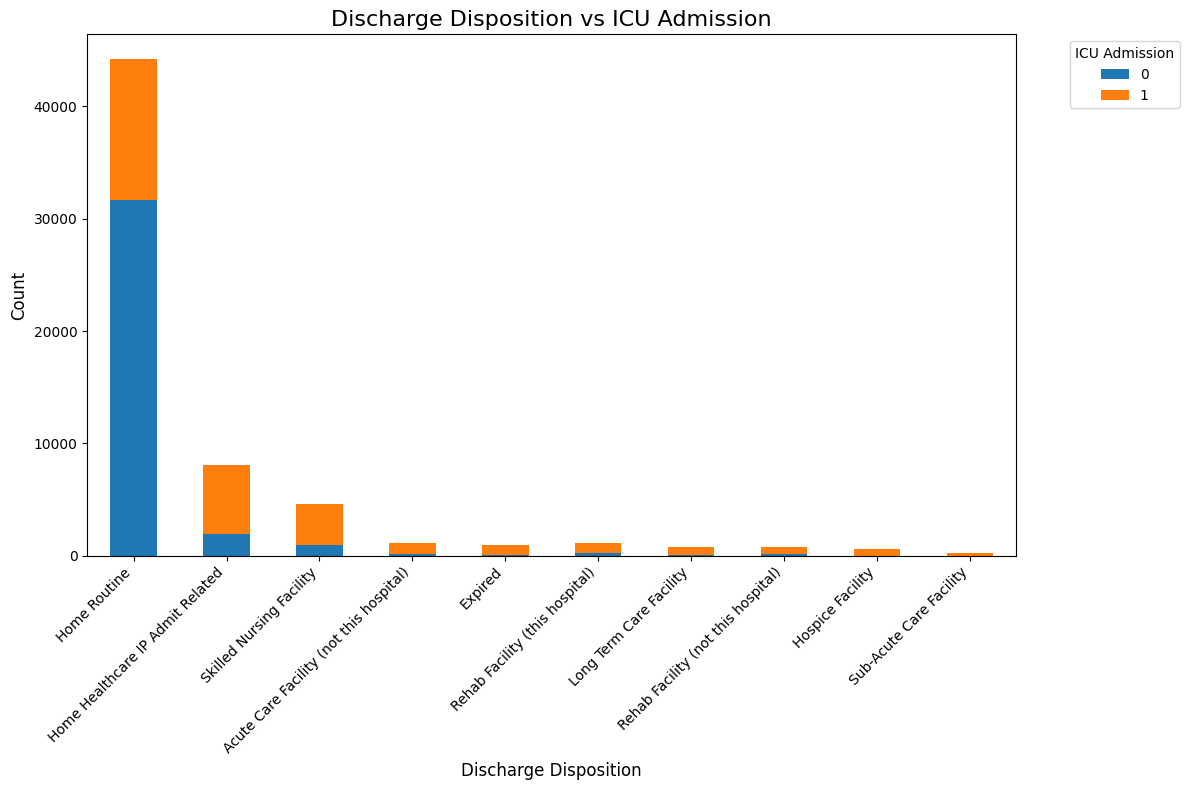

In [6]:
crosstab = pd.crosstab(df['DISCH_DISP'], df['ICU_ADMIN_FLAG'])

# Sort the data by total counts
crosstab = crosstab.sort_values(by=crosstab.sum().index[-1], ascending=False)

# Select top N discharge dispositions for better readability
top_n = 10
crosstab_top = crosstab.head(top_n)
# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Create the stacked bar graph
crosstab_top.plot(kind='bar', stacked=True, ax=ax)

# Customize the plot
plt.title('Discharge Disposition vs ICU Admission', fontsize=16)
plt.xlabel('Discharge Disposition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='ICU Admission', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()